
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 
> The dataset titled No-show Appointments is representing "the dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment"

> The dataset has 14 columns that name are:
PatientId         
AppointmentID     
Gender             
ScheduledDay     
AppointmentDay     
Age                 
Neighbourhood      
Scholarship         
Hipertension        
Diabetes           
Alcoholism          
Handcap             
SMS_received        
No-show            

### Question(s) for Analysis
 
> Does The Two 'Genders' Show Different Behavoir Regarding Show/ No-show to Their Appointment?

> Does The Neighbourhoods Have an Effect on Attending The Appointment?

> Does The Number of Days Between the Schedlue day and Appointment Day Has an Effect on Attending The Appointment?


In [1]:
# import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
def Load_data(file_name):
    """ Use to load data from a cvs file and return a dataframe """
    df = pd.read_csv(file_name);
    return df


def describe_data(df):
    """ Use to compute the statistics of an assigned dataframe """
    df_ = df.describe()
    return df_

<a id='wrangling'></a>
## Data Wrangling


In [4]:
df = Load_data('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The data was loaded and a datafram was created. The column header was displayed. 

In [5]:
describe_data(df)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The stastistics was computed for each column.

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

This table represent the type of each column enetry


### Data Cleaning

 

In [7]:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

The data type shows that the 'ScheduledDay' and 'AppointmentDay' are in a string format, so they switched to be in a daytime format for further analysis.

In [8]:
df['Sch_month'] = df['ScheduledDay'].dt.month
df['Sch_day'] = df['ScheduledDay'].dt.day
df['App_month'] = df['AppointmentDay'].dt.month
df['App_day'] = df['AppointmentDay'].dt.day

Four columns were added to show in detail the SchdulDay and AppointmentDay data entry

In [9]:
df['num_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

New column is added called 'num_days' indicates the number of days from schedling day of the appointment till the actual appointment day.

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_month,Sch_day,App_month,App_day,num_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,29,4,29,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,29,4,29,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,29,4,29,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,29,4,29,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,29,4,29,-1


In [11]:
print(sum(df.duplicated()))

0


This line for checking for a duplicate entery

In [12]:
df = df.drop(df[df['Age'] <= 0].index)

Negative 'Age' values have been noticed, so they are removed for the dataset for an accurate data analysis

In [13]:
df = df.drop(df[df['Handcap'] > 1].index)

Values higher than 1 have been noticed in 'Handcap' column, so they are removed as this column take only either 0 or 1 as an entry.

In [14]:
df = df.drop(df[df['num_days'] < 0].index)

Negative 'num_days' values have been noticed, so they are removed from the dataset for an accurate data analysis as the appointment day cannot come before schedling day.

<a id='eda'></a>
## Exploratory Data Analysis



### Does The Two 'Genders' Show Different Behavoir Regarding Show/ No-show to Their Appointment

First, Check the percentage of Male and Female and the percenatge of Show - No-show 

No     0.714558
Yes    0.285442
Name: No-show, dtype: float64

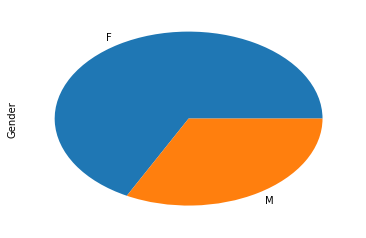

In [15]:
df['Gender'].value_counts().plot(kind='pie');
df['No-show'].value_counts(6)

From the pie chart the percentage of Female in this dataset is around 67% and the rest is male. Also the percentage of patient showing to there appointement is around 71%.

In [16]:
df['Gender'].value_counts(6)

F    0.673701
M    0.326299
Name: Gender, dtype: float64

To further explore the data, the dataset will be divided based on "Gender" (Male and Femal). Then, the percenatge of Show - No-show is computed

In [17]:
df_m = df[df['Gender'] == 'M']
df_f = df[df['Gender'] == 'F']

In [18]:
x = df_m['No-show'].value_counts(1)
print(x)
y = df_f['No-show'].value_counts(1)
print(y)

No     0.712376
Yes    0.287624
Name: No-show, dtype: float64
No     0.715615
Yes    0.284385
Name: No-show, dtype: float64


The results in both sets show a similarity to the main dataset with around 71% showing to there appointement with a slight high no show amoung male.

In [19]:
describe_data(df_m)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,2.274500e+04,2.274500e+04,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000,22745.000000
mean,1.481831e+14,5.655767e+06,36.912552,0.048582,0.193757,0.071049,0.048274,0.020796,0.475093,4.618466,15.322049,5.210947,12.452011,14.403561
std,2.560095e+14,7.392795e+04,23.954550,0.214997,0.395249,0.256912,0.214350,0.142703,0.499390,0.733987,9.372218,0.476306,9.074960,16.204376
min,1.417242e+05,5.122866e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,4.258696e+12,5.618664e+06,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,3.000000
50%,3.284838e+13,5.661706e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000,5.000000,10.000000,8.000000
75%,9.444517e+13,5.707145e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,25.000000,5.000000,19.000000,21.000000
max,9.999320e+14,5.784952e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


In [20]:
describe_data(df_f)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,4.696100e+04,4.696100e+04,46961.000000,46961.000000,46961.00000,46961.000000,46961.000000,46961.000000,46961.000000,46961.000000,46961.000000,46961.000000,46961.000000,46961.000000
mean,1.437475e+14,5.655150e+06,40.995273,0.117800,0.22508,0.079470,0.015268,0.015162,0.505356,4.622900,15.103298,5.212027,12.521646,14.665914
std,2.522481e+14,7.523260e+04,21.229924,0.322374,0.41764,0.270474,0.122618,0.122196,0.499977,0.743726,9.351161,0.476667,9.058679,16.663160
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,3.889158e+12,5.617846e+06,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,3.000000
50%,2.912282e+13,5.661544e+06,41.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,15.000000,5.000000,10.000000,8.000000
75%,9.334735e+13,5.707750e+06,57.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,25.000000,5.000000,19.000000,21.000000
max,9.999275e+14,5.784985e+06,115.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


### The relation between Female and show / No-show

In [21]:
df_fy = df_f[df_f['No-show'] == 'Yes']
df_fn = df_f[df_f['No-show'] == 'No']

The two datasets is further divided by whether patinet is showing or not to his/her appointment. Then the statistics is computed as follow: 

In [22]:
describe_data(df_fy)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,1.335500e+04,1.335500e+04,13355.000000,13355.000000,13355.000000,13355.000000,13355.00000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000
mean,1.455965e+14,5.647718e+06,37.140696,0.146612,0.186073,0.070910,0.02164,0.014152,0.494422,4.546911,15.366979,5.190490,12.628154,16.093224
std,2.541859e+14,7.458022e+04,20.616169,0.353732,0.389180,0.256684,0.14551,0.118122,0.499988,0.739023,9.256898,0.459649,8.921182,16.642469
min,6.485121e+07,5.134197e+06,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,4.176779e+12,5.608480e+06,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,4.000000
50%,3.135918e+13,5.653222e+06,35.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,15.000000,5.000000,11.000000,12.000000
75%,9.438909e+13,5.698566e+06,52.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,5.000000,25.000000,5.000000,19.000000,24.000000
max,9.996585e+14,5.784663e+06,115.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


In [23]:
describe_data(df_fn)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,3.360600e+04,3.360600e+04,33606.000000,33606.00000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000,33606.000000
mean,1.430127e+14,5.658103e+06,42.527078,0.10635,0.240582,0.082872,0.012736,0.015563,0.509701,4.653098,14.998512,5.220586,12.479319,14.098703
std,2.514739e+14,7.528796e+04,21.276231,0.30829,0.427443,0.275693,0.112134,0.123778,0.499913,0.743445,9.386438,0.483004,9.112531,16.637658
min,3.921784e+04,5.030230e+06,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,3.818939e+12,5.621540e+06,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,3.000000
50%,2.866272e+13,5.665324e+06,44.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,15.000000,5.000000,10.000000,7.000000
75%,9.272451e+13,5.710639e+06,59.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,24.000000,6.000000,19.000000,20.000000
max,9.999275e+14,5.784985e+06,115.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


Looking at each factor, Female at younger age tend to no show to their appointement. Same thing can be said for having a scholarship and receving SMS tend to miss their appointement. Also, Females who have Hipertension, Diabetes, or are handcap tend to show to their appointment. Alcoholism can be another factor for not showing to the appointment. 

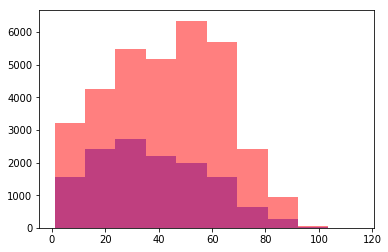

In [24]:
plt.hist(df_fy['Age'], color = 'b', alpha = 0.5)
plt.hist(df_fn['Age'], color = 'r', alpha = 0.5)
plt.show;

The histogram shows the age distribution where it can be seen that female at younger age tend to miss their appointement.

### The relation between Male and show / No-show

Doing the same analysis for Male.

In [25]:
df_ym = df_m[df_m['No-show'] == 'Yes']
df_nm = df_m[df_m['No-show'] == 'No']

In [26]:
describe_data(df_ym)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,6.542000e+03,6.542000e+03,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000
mean,1.489071e+14,5.647416e+06,33.155916,0.056099,0.157444,0.059156,0.050443,0.016509,0.451850,4.545705,15.444665,5.195965,12.587435,16.330633
std,2.556781e+14,7.414594e+04,22.699081,0.230130,0.364247,0.235935,0.218875,0.127431,0.497714,0.751479,9.246207,0.467369,8.945088,16.582363
min,5.628261e+06,5.122866e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,4.121784e+12,5.606305e+06,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,4.000000
50%,3.154340e+13,5.652874e+06,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000,5.000000,10.000000,12.000000
75%,9.531882e+13,5.697981e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,25.000000,5.000000,19.000000,25.000000
max,9.996275e+14,5.783943e+06,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


In [27]:
describe_data(df_nm)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Sch_month,Sch_day,App_month,App_day,num_days
count,1.620300e+04,1.620300e+04,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000
mean,1.478907e+14,5.659139e+06,38.429303,0.045547,0.208418,0.075850,0.047399,0.022527,0.484478,4.647843,15.272542,5.216997,12.397334,13.625501
std,2.561505e+14,7.357388e+04,24.279693,0.208507,0.406190,0.264766,0.212497,0.148393,0.499774,0.724762,9.422448,0.479749,9.126577,15.984052
min,1.417242e+05,5.134227e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000
25%,4.292658e+12,5.623798e+06,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,5.000000,3.000000
50%,3.343540e+13,5.665394e+06,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000,5.000000,10.000000,7.000000
75%,9.417089e+13,5.710570e+06,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,25.000000,5.000000,19.000000,20.000000
max,9.999320e+14,5.784952e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,31.000000,178.000000


Similary to the Female result, Male at younger age tend to no show to their appointement. Same thing can be said for having a scholarship and receving SMS tend to miss their appointement. Also, Males who have Hipertension, Diabetes, or are handcap tend to show to their appointment. Alcoholism can be another factor for not showing to the appointment. 

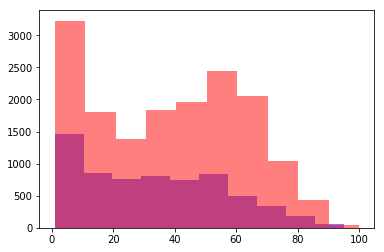

In [28]:
plt.hist(df_ym['Age'], color = 'b', alpha = 0.5)
plt.hist(df_nm['Age'], color = 'r', alpha = 0.5)
plt.show;

The histogram shows the age distribution where it can be seen that female at younger age tend to miss their appointement.

### Does The Neighbourhoods Have an Effect on Attending The Appointment

In [29]:
print(df_fy['Neighbourhood'].mode()[0])

JARDIM CAMBURI


In [30]:
print(df_fn['Neighbourhood'].mode()[0])

JARDIM CAMBURI


In [31]:
print(df_nm['Neighbourhood'].mode()[0])

JARDIM CAMBURI


In [32]:
print(df_ym['Neighbourhood'].mode()[0])

JARDIM CAMBURI


The majority of patient who showed up to their appointment and who did not show up were coming from the same neighbourhood. 

### Does The Number of Days Between the Schedlue day and Appointment Day Has an Effect on Attending The Appointment

The number of days between the schedlue day and appointment day for the four datasets has been ploted as shwon below:

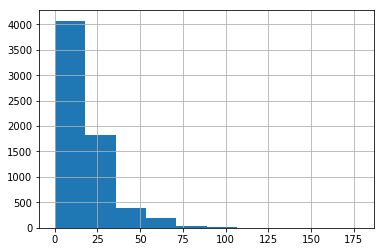

In [33]:
df_ym['num_days'].hist();

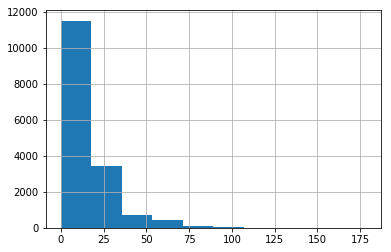

In [34]:
df_nm['num_days'].hist();

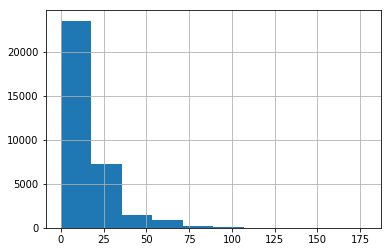

In [35]:
df_fn['num_days'].hist();

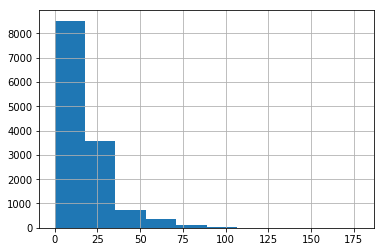

In [36]:
df_fy['num_days'].hist();

The four graphs show a similarit, where showing and not shwoing have the same trend regarding the number of days.

In [37]:
print(df_fn['App_month'].value_counts(6))
df_fn['Sch_month'].value_counts(6)

5    0.718056
6    0.251265
4    0.030679
Name: App_month, dtype: float64


5     0.555942
4     0.318485
6     0.072814
3     0.047759
2     0.003184
12    0.000982
1     0.000803
11    0.000030
Name: Sch_month, dtype: float64

In [38]:
print(df_fy['App_month'].value_counts(6))
df_fy['Sch_month'].value_counts(6)

5    0.752452
6    0.219019
4    0.028529
Name: App_month, dtype: float64


5     0.507825
4     0.378660
3     0.056982
6     0.050468
2     0.004268
1     0.000973
12    0.000824
Name: Sch_month, dtype: float64

Even the major months for show/ no-show are the same.

<a id='conclusions'></a>
## Conclusions

> The dataset that has been anaylized is from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

> First, the data was cleaned to perform an accurate analysis. Then, an overall look at the data was performed finding that around 71% of the patients were showing up for their appointment.

> Then, the dataset was divided into to sub-dataset based of 'Gender' to explore whether the gender could effect the show/ no-show varibale. The results show that around 71% showing to there appointement with a slight high no show amoung male.

> Next, the two sub-datasets was further divided into two sub-datasets based on 'Show/ No-show'. The results represent that patients at younger age tend to no show to their appointement. Same thing can be said for having a scholarship and receving SMS tend to miss their appointement. Also, patients who have Hipertension, Diabetes, or are handcap tend to show to their appointment. Alcoholism can be another factor for not showing to the appointment.

> Then, the major neighbourhood that most patients who show/no-show turns out to be 'JARDIM CAMBURI'.

> Finally, the number of days between the schedlue day and appointment day was examined to see if there is any correlation with patients show/ no-show to their appointment.

> The analysis need more investigation as it is not clear the the number of hospitals that exist in each neighbour. Also, the factors that affect show/ no-show are very close and no sharp conclusion can be made.  


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0